In [8]:
# Sanity check for Python3
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 required!")

# Pandas data analysis module
import pandas as pd
%matplotlib inline

# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will 
# require a .read() method
from io import StringIO

# Plotting time series graph
import seaborn as sns
import matplotlib.pyplot as plt

# Round-up numbers
# import math

In [9]:
# P1: Use the same URL link to the .csv file to download data
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
src = requests.get(url).text

In [10]:
# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(src)

# Set poll data as pandas DataFrame
pf = pd.read_csv(poll_data)

In [11]:
# P2: Describe the “Romney” data using the describe function
pf['Romney'].describe()

count    586.000000
mean      44.614334
std        2.906180
min       32.000000
25%       43.000000
50%       45.000000
75%       46.750000
max       53.000000
Name: Romney, dtype: float64

In [20]:
# P3: Find out pollster(s) on which Romney received the most and the 
# least votes

# Could use df.columns.str.replace('$','') to strip space of column name

# New column for calculation
pf['Romney Votes'] = pf['Number of Observations'] * pf['Romney'] / 100

# Drop NaN rows
pf_nandropped = pf.dropna(subset=['Number of Observations'])

# Aggregate rows from the same date using dictionary
bf = {'Romney Votes':'sum'}
pf_grouped0 = pf_nandropped.groupby('Pollster', as_index=False).agg(bf).reindex(columns=pf_nandropped.columns)

# Should use floor() since there are "Others"?
pf_nandropped['Romney Votes'] = pf_nandropped['Romney Votes'].round(0)

# pf.loc[pf['Romney Votes'].notnull(), 'Romney Votes'] = pf.loc[pf['Romney Votes'].notnull(), 'Romney Votes'].apply(int)

max = pf_grouped0['Romney Votes'].max()
max_i = pf_grouped0.iloc[pf_grouped0['Romney Votes'].idxmax()]['Pollster']
min = pf_grouped0['Romney Votes'].min()
min_i = pf_grouped0.iloc[pf_grouped0['Romney Votes'].idxmin()]['Pollster']
print("Romney received the most from \"%s\" with %i votes, whereas the least from \"%s\" with %i votes." \
      % (max_i, int(max), min_i, int(min)))

Romney received the most from "Rasmussen" with 71627 votes, whereas the least from "Esquire/Yahoo! News" with 333 votes.


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5,1,"Time Series Graph of total number of Romney's votes")

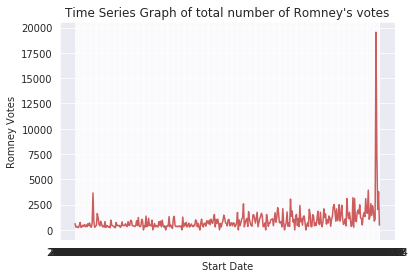

In [23]:
# P4: Draw a time series graph that shows the total number of Romney’s
# votes along with pollster start date

# Aggregate rows from the same date using dictionary
af = {'Romney Votes':'sum'}
pf_grouped = pf.groupby('Start Date', as_index=False).agg(af).reindex(columns=pf.columns)
# pf = pf.sort_values(['Start Date', 'Romney Votes'])

# Final pointplot
sns.set_style(style="darkgrid")
sns.lineplot(x="Start Date", y="Romney Votes", data=pf_grouped, color="indianred").set_title('Time Series Graph of total number of Romney\'s votes')